In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from glob import glob
import pickle

from utils import FEATURES_DIR, RESULTS_DIR
from analyses.ridge_regression_decoding import NUM_CV_SPLITS, GLM_OUT_DIR
from notebook_utils import load_results_data, add_avg_subject, plot_metrics

/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
all_data = load_results_data()
all_data

,alpha,model,subject,features,training_mode,testing_mode,fold,best_val_loss,best_val_acc,metric,value
0,1000.0,clip_avg,sub-01,avg,train,test,0.0,False,False,val_loss,0.948725
1,1000.0,clip_avg,sub-01,avg,train,test,0.0,False,False,val_rsa,0.033049
2,1000.0,clip_avg,sub-01,avg,train,test,0.0,False,False,rsa,0.191820
3,1000.0,clip_avg,sub-01,avg,train,test,0.0,False,False,acc_cosine,0.871429
4,1000.0,clip_avg,sub-01,avg,train,test,0.0,False,False,acc_cosine_captions,0.834369
...,...,...,...,...,...,...,...,...,...,...,...
11447,10000000.0,visualbert_concat,sub-07,concat,train,test,4.0,False,False,rsa,0.089533
11448,10000000.0,visualbert_concat,sub-07,concat,train,test,4.0,False,False,acc_cosine,0.693582
11449,10000000.0,visualbert_concat,sub-07,concat,train,test,4.0,False,False,acc_cosine_captions,0.647205
11450,10000000.0,visualbert_concat,sub-07,concat,train,test,4.0,False,False,acc_cosine_images,0.815942


,alpha,model,subject,features,training_mode,testing_mode,fold,best_val_loss,best_val_acc,metric,value
1448,100000.0,vilt_avg,average,avg,train,test,NaN,False,True,acc_cosine,0.877226
1449,100000.0,vilt_avg,average,avg,train,test,NaN,False,True,acc_cosine_captions,0.845549
1450,100000.0,vilt_avg,average,avg,train,test,NaN,False,True,acc_cosine_images,0.949068
1561,100000.0,vilt_concat,average,concat,train,test,NaN,False,True,acc_cosine,0.884472
1562,100000.0,vilt_concat,average,concat,train,test,NaN,False,True,acc_cosine_captions,0.858385
1563,100000.0,vilt_concat,average,concat,train,test,NaN,False,True,acc_cosine_images,0.950725
1702,100000.0,vilt_lang,average,lang,train,test,NaN,False,True,acc_cosine,0.891304
1703,100000.0,vilt_lang,average,lang,train,test,NaN,False,True,acc_cosine_captions,0.877640
1704,100000.0,vilt_lang,average,lang,train,test,NaN,False,True,acc_cosine_images,0.932505
1815,100000.0,vilt_vision,average,vision,train,test,NaN,False,True,acc_cosine,0.855176


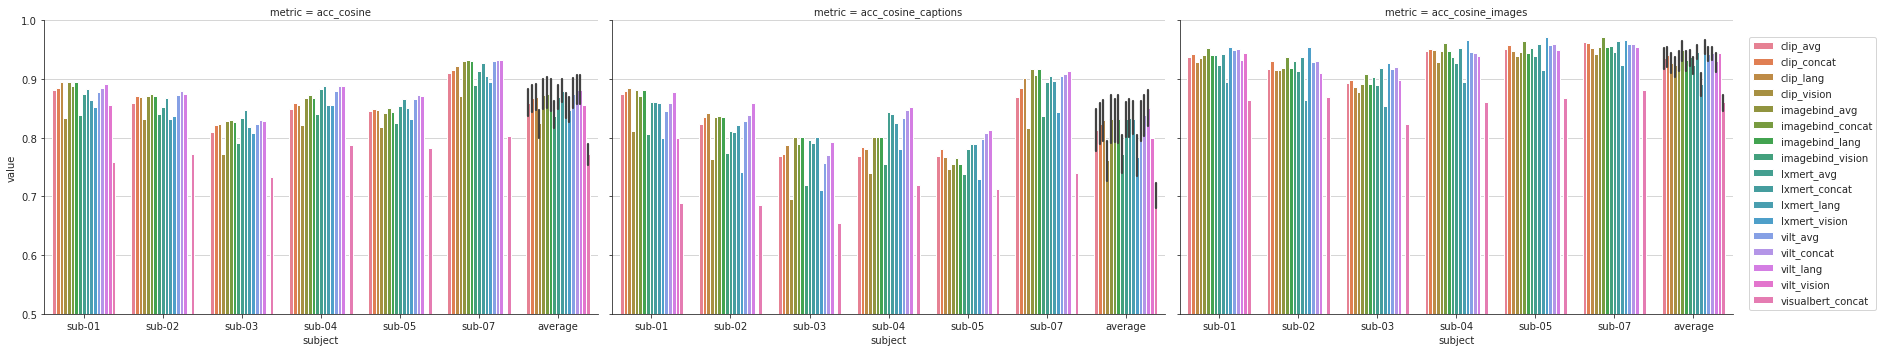

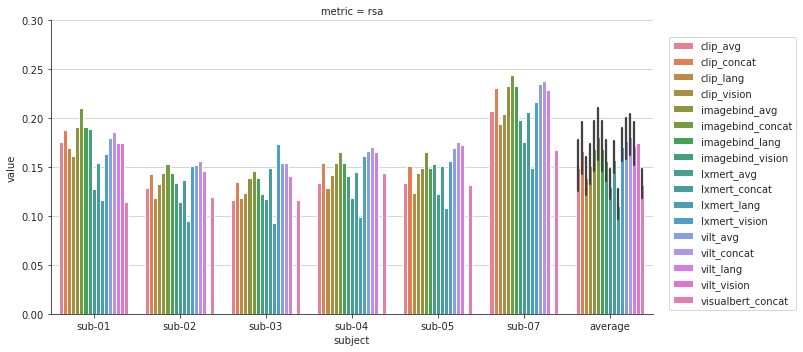

In [3]:
data_to_plot = all_data

data_to_plot = data_to_plot[data_to_plot.best_val_acc == True]
# data_to_plot = data_to_plot[data_to_plot.best_val_loss == True]

# data_to_plot = data_to_plot[data_to_plot.subject.isin(['sub-01', 'sub-02'])]
# data_to_plot = data_to_plot[data_to_plot.model.isin(['clip_lang', 'vilt_concat'])]

g, data_plotted = plot_metrics(data_to_plot)
plot_metrics(data_to_plot, metrics=["rsa"], ylim=(0, 0.3))

data_to_print = data_plotted[data_plotted.subject == "average"]
data_to_print = data_to_print[data_to_print.model.str.contains('vilt')]

In [4]:
all_data[all_data.best_val_loss == True].alpha.unique()

array([  100000., 10000000.])

In [14]:
data_to_print = data_plotted[data_plotted.subject == "average"]
data_to_print = data_to_print[data_to_print.model.str.contains('vilt_lang')]
data_to_print[data_to_print.metric == "acc_cosine"].value.mean()

0.8812284334023465